# Dependencies
Execute the following in the terminal before running this notebook:
`pip install -r requirements.txt`

# Exercise 1: Body temperature clinical decision support

In [ ]:
# Code
#import numpy as np

def temp_tester(normalTemp): # Defines normal body temperature
    def tester(givenTemp): # Tests given temperature against normal body temperature
        if givenTemp in range(normalTemp - 1, normalTemp + 1): # Check if givenTemp is within 1 degree of normalTemp
        #if givenTemp in np.arange(normalTemp - 1, normalTemp + 1, 0.1):
            return True
        return False
    return tester

In [ ]:
# Tests
human_tester = temp_tester(37)
chicken_tester = temp_tester(41.1) # Code currently does not work for float temps

print(chicken_tester(42)) # True
print(human_tester(42)) # False
print(chicken_tester(43)) # False
print(human_tester(35)) # False
print(human_tester(98.6)) # False

# Exercise 2: FASTQ and Unicode

In [1]:
# Code
def better_quality(char_a, char_b):
    codepoint_a = ord(char_a) # Convert characters to Unicode code points (numbers)
    codepoint_b = ord(char_b)
    if codepoint_a > codepoint_b:
        return char_a
    return char_b

In [6]:
# Tests
test_a = "!"
test_b = "("
print("The quality of", test_a, "is", ord(test_a))
print("The quality of", test_b, "is", ord(test_b))
print("The character with better quality is", better_quality("!", "("))

The quality of ! is 33
The quality of ( is 40
The character with better quality is (


**Explanation:** As demonstrated above, I first select two characters, `test_a` and `test_b`, and provide their Unicode code points. It is clear that `test_a` has a lower code point (or quality score) than `test_b`. I then test my function, which accurately determines that `test_b` is of higher quality. 

In [7]:
# Code
def best_quality(seq):
    # Calculate quality scores
    quality_scores = []
    for i in range(len(seq)):
        quality_scores.append(ord(seq[i]))

    # Calculate average quality score
    avg = sum(quality_scores) / len(quality_scores)     

    # Create dictionary of answers
    answers = {
        "best": seq[quality_scores.index(max(quality_scores))], # Best quality measurement in the sequence
        "average_num": avg, # Average quality score of the sequence
        "average_char": chr(int(avg)) # Average quality score as a Unicode character (truncate float)
    }
    return answers

In [8]:
# Tests
seq = "!''*((((***+))%%%++)(%%%%).1***-+*''))**55CCF>>>>>>CCCCCCC65"
best_quality(seq)

{'best': 'F', 'average_num': 48.06666666666667, 'average_char': '0'}

**Explanation:** To determine the best quality score in the given string, I first create a list to hold the quality scores and calculate the quality scores for each character in the string, appending each to the list. Then, when reporting the answer, I find the maximum score in the list, extract the index of that score, and report the character corresponding to that index in the original string. To calculate the average quality score, I sum all the quality scores in the list and divide by the length of the list; this returned a float. To report this as a character, I chose to truncate the float by casting it as an integer, and then converting it to a character. Consequently, the average character may be inflated or deflated compared to the actual average depending on the decimal. To simultaneously report the best quality measurement, the average quality measurement, and the single-character quality score, I chose to return a dictionary. I am convinced that the function works because it correctly reports the best quality character, `F`, which has the highest code point in Unicode; it provides a reasonable average quality score; and the average character is the correct conversion from the average score.

# Exercise 3: Intravenous fluid administration

In [9]:
# Medical device company's first draft of code
def administer_meds(delta_t, tstop): # Arguments: time increment, time limit to stop administration
    t = 0 # Start time
    while t < tstop: # Stop administration once time limit is elapsed
        print(f"Administering meds at t={t}") # Release fluids
        t += delta_t # Advance time

**Explanation:** The function administers medication until a defined time limit (`tstop`), incrementing by a defined time interval (`delta_t`). It administers one dose per loop, for a total of `t / delta_t` doses.

In [10]:
print("Dose Test 1")
administer_meds(0.25, 1)
print("Dose Test 2")
administer_meds(0.1, 1)

Dose Test 1
Administering meds at t=0
Administering meds at t=0.25
Administering meds at t=0.5
Administering meds at t=0.75
Dose Test 2
Administering meds at t=0
Administering meds at t=0.1
Administering meds at t=0.2
Administering meds at t=0.30000000000000004
Administering meds at t=0.4
Administering meds at t=0.5
Administering meds at t=0.6
Administering meds at t=0.7
Administering meds at t=0.7999999999999999
Administering meds at t=0.8999999999999999
Administering meds at t=0.9999999999999999


**Explanation, discussion of findings, and clinical significance:** Calling `administer_meds(0.25, 1)` causes the loop to run four times, administering four doses. Because the function administers the dose first before incrementing the time, the doses are administered starting at $time = 0$, incrementing by $0.25$ for a total of four doses until $1.0$ is reached. This is expected behavior, as $1/0.25 = 4$ doses were expected, and all of the exact times were reached. The clinical significance of this result is that the doses are administered correctly, but administered a bit in advance before the time limit is reached.

On the other hand, calling `administer_meds(0.1, 1)` causes the loop to run 11 times, administering 11 doses at odd time intervals. This is unexpected behavior, because $1/0.1=10$ doses were expected, the time intervals were not consistent, and there were strange floating point numbers (`t=0.30000000000000004`, `t=0.7999999999999999`, `t=0.8999999999999999`, `t=0.9999999999999999`). This is due to [how Python represents floating point numbers](https://docs.python.org/3/tutorial/floatingpoint.html): floating point numbers in Python are only an approximation with a limited number of significant digits. Consequently, arithmetic with these numbers can produce unexpected results. The clinical significance of this result is that the function administers more doses than intended, may be administering them at unintended times, and administers them a bit in advance before the time limit is reached.

In [23]:
# Version without surprises:
from decimal import *

def administer_meds(delta_t, tstop):
    t = 0
    while t < tstop:
        print(f"Administering meds at t={t}")
        t += Decimal(delta_t) # Python's decimal library has higher precision decimal arithmetic

In [24]:
# Tests
print("Dose Test 1")
administer_meds(0.25, 1)
print("Dose Test 2")
administer_meds(0.1, 1)

Dose Test 1
Administering meds at t=0
Administering meds at t=0.2
Administering meds at t=0.4
Administering meds at t=0.6
Administering meds at t=0.8
Dose Test 2
Administering meds at t=0
Administering meds at t=0.1
Administering meds at t=0.2
Administering meds at t=0.3
Administering meds at t=0.4
Administering meds at t=0.5
Administering meds at t=0.6
Administering meds at t=0.7
Administering meds at t=0.8
Administering meds at t=0.9


# Exercise 4: Analysis of historical COVID-19 data
Data from [The New York Times](https://github.com/nytimes/covid-19-data), based on reports from state and local health agencies.

In [58]:
# Load historical data for COVID-19 cases by state
import pandas as pd

covid = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
#covid['date'] = pd.to_datetime(covid['date']) # Convert date column to date format
covid = covid.assign(new_cases = covid.groupby(['state']).cases.diff()).fillna(0) # Calculate daily new cases

In [45]:
# Plot new cases by state
import seaborn as sb

def cases_vs_date(data, states):
    data = data[data['state'].isin(states)] # Select only rows matching indicated states
    data_wide = data.pivot(index = "date", columns = "state", values = "new_cases") # Convert to wide-form data
    plot = sb.lineplot(data = data_wide) # Create line plot
    plot.set(title= "New COVID-19 Cases by Date (Data from The New York Times)", # Set title
             xlabel = "Date", # Set axis labels 
             ylabel = "Cases")
    plot.set_xticklabels(plot.get_xticklabels(), 
                         rotation = 45, # Rotate x-axis labels
                         horizontalalignment = "right") # Shift x-axis labels to the left

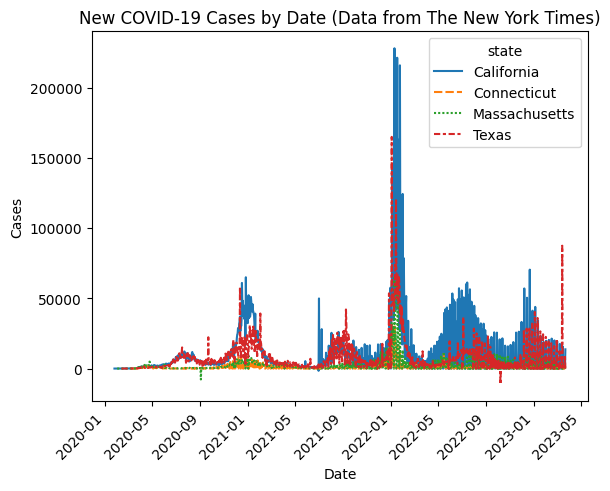

In [53]:
# Tests
import warnings
warnings.filterwarnings('ignore') # Suppress seaborn's warnings

states = ["Texas", "California", "Connecticut", "Massachusetts"]
cases_vs_date(covid, states)

#states = ["Hawaii", "Florida", "North Carolina", "Michigan", "Washington"]
#cases_vs_date(covid, states)

**Limitations:** 

In [89]:
# Code
from dateutil.parser import parse

def date_highest_new_cases(data, state):
    data = data[data['state'].str.contains(state)] # Select only rows matching indicated states
    return str(parse(data.loc[data['new_cases'].idxmax(), ]['date']).date()) # Find date with highest number of daily cases

In [91]:
# Test
states = ["California", "Texas", "Connecticut", "Massachusetts"]
for state in states:
    print(f"{state} had the highest number of COVID-19 cases on {date_highest_new_cases(covid, state)}.")

California had the highest number of COVID-19 cases on 2022-01-10.
Texas had the highest number of COVID-19 cases on 2022-01-03.
Connecticut had the highest number of COVID-19 cases on 2022-01-10.
Massachusetts had the highest number of COVID-19 cases on 2022-01-10.


In [92]:
# Code
from dateutil.parser import parse

def case_peaks(state_1, state_2):
     date_1 = parse(date_highest_new_cases(covid, state_1))
     date_2 = parse(date_highest_new_cases(covid, state_2))
     if date_1 < date_2:
          print(state_1, "peaked", (date_2 - date_1).days, "days ahead of", state_2) 
     elif date_1 > date_2:
          print(state_2, "peaked", (date_1 - date_2).days, "days ahead of", state_1) 
     else:
          print(state_1, "and", state_2, "peaked on the same day")
          

In [94]:
# Tests
case_peaks("California", "Texas")
case_peaks("Texas", "Texas")
case_peaks("Hawaii", "Montana")
case_peaks("Florida", "South Carolina")
case_peaks("District of Columbia", "Maryland")

Texas peaked 7 days ahead of California
Texas and Texas peaked on the same day
Montana peaked 247 days ahead of Hawaii
Florida peaked 14 days ahead of South Carolina
Maryland peaked 1 days ahead of District of Columbia
Maryland peaked 1 days ahead of District of Columbia


# Exercise 5: Analysis of MeSH data
Data from [The National Library of Medicine](https://nlmpubs.nlm.nih.gov/projects/mesh/MESH_FILES/xmlmesh/).

In [ ]:
# Read XML and extract values
mesh = pd.read_xml("https://nlmpubs.nlm.nih.gov/projects/mesh/MESH_FILES/xmlmesh/desc2023.xml")